In [1]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

# Load the dataset into a pandas dataframe
df = pd.read_csv('Data/Psychedelic_mushroom_DATA.csv')
df.head(5)

,CASEID_7139,COHORTS,PYS_USE_VENN,PSY_USE_YN,PM_USE_YN,PM_USE_ONLY_YN,PM_VS_PSY_YN,SEX,AGE,ETHNICITY,...,PSY2_UNDIAG_CONCERN,PSY2_NO_KNOWLEDGE,PM1_GEN_HEALTH,PM1_DIAG_CONDITION,PM1_UNDIAG_CONCERN,PM2_FREQ_COVID,PM3_FREQ_POLITICS,PM4_CARE,INSURANCE,DATA_WEIGHT
0,1,1.0,1.0,1.0,1.0,1.0,2.0,0,19.0,3.0,...,0,0,1,0,0,2,3,0,0,57772.54
1,2,1.0,1.0,1.0,1.0,1.0,2.0,0,21.0,2.0,...,1,0,1,0,0,3,3,0,1,25738.42
2,3,1.0,1.0,1.0,1.0,1.0,2.0,0,22.0,2.0,...,1,0,0,0,0,3,4,0,0,42172.56
3,4,1.0,1.0,1.0,1.0,1.0,2.0,0,22.0,2.0,...,0,0,1,0,0,3,3,0,1,28356.81
4,5,1.0,1.0,1.0,1.0,1.0,2.0,0,23.0,2.0,...,1,0,1,0,0,3,3,0,1,25738.42


In [3]:
df.COHORTS.value_counts()
df.columns

Index(['CASEID_7139', 'COHORTS', 'PYS_USE_VENN', 'PSY_USE_YN', 'PM_USE_YN',
       'PM_USE_ONLY_YN', 'PM_VS_PSY_YN', 'SEX', 'AGE', 'ETHNICITY', 'HLS_YN',
       'REGION', 'ED', 'EMPL', 'INCOME', 'BMI', 'C_TOTAL', 'C_DP', 'C_ANX',
       'C_PN', 'C_ALL', 'C_MI', 'C_INSOM', 'C_HYP', 'C_DH', 'C_SA', 'C_GERD',
       'C_CS', 'C_LIP', 'CCI_SCORE', 'GAD7_SCORE', 'PHQ9_SCORE', 'GAD7_GE10',
       'PHQ9_GE10', 'PCS12', 'MCS12', 'VR6D', 'RU_PCP_YN', 'RU_SPECIAL_YN',
       'RU_OTPCP_YN', 'RU_UCC_YN', 'RU_OUTPT_YN', 'RU_ER_YN', 'RU_HSP_YN',
       'PSY1_POSITIVE_USE', 'PSY2_GEN_HEALTH', 'PSY2_DIAG_CONDITION',
       'PSY2_UNDIAG_CONCERN', 'PSY2_NO_KNOWLEDGE', 'PM1_GEN_HEALTH',
       'PM1_DIAG_CONDITION', 'PM1_UNDIAG_CONCERN', 'PM2_FREQ_COVID',
       'PM3_FREQ_POLITICS', 'PM4_CARE', 'INSURANCE', 'DATA_WEIGHT'],
      dtype='object')

In [4]:
def labelize(cohort):
    if cohort == 0:
        return 0
    else:
        return 1
df['label'] = df['COHORTS'].apply(labelize)

In [5]:
df.label.value_counts()

0    6613
1     526
Name: label, dtype: int64

In [6]:
df.EMPL

0       0.0
1       0.0
2       0.0
3       0.0
4       1.0
       ... 
7134    0.0
7135    0.0
7136    0.0
7137    0.0
7138    0.0
Name: EMPL, Length: 7139, dtype: float64

## Baseline Model

For the baseline model, the predictive variables are: demographic and socioecomomic status, and health conditions.

Accuracy: 0.9299719887955182
[[1326    1]
 [  99    2]]


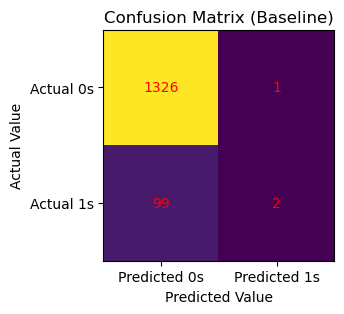

In [8]:
X1 = df[['SEX', 'AGE', 'ETHNICITY', 'HLS_YN', 'REGION', 'INSURANCE',
        'BMI', 'C_TOTAL', 'C_DP', 'C_ANX', 'C_PN', 'C_ALL', 'C_MI', 'C_INSOM', 'C_HYP', 'C_DH', 'C_SA', 'C_GERD', 'C_CS', 'C_LIP', 
        'CCI_SCORE', 'GAD7_SCORE', 'PHQ9_SCORE', 'GAD7_GE10', 'PHQ9_GE10', 'PCS12', 'MCS12', 'VR6D']]
y1 = df['label']

# Split data into training and testing sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

# # Fit a random forest model
rf1 = RandomForestClassifier(n_estimators=100, random_state=42)
rf1.fit(X1_train, y1_train)


# Evaluate model performance on test set
accuracy = rf1.score(X1_test, y1_test)
print(f"Accuracy: {accuracy}")


# lr = LogisticRegression(C=1.0)
# lr.fit(X1_train, y1_train)
# accuracy = lr.score(X1_test, y1_test)
# print(f"Accuracy: {accuracy}")

predictions = rf1.predict(X1_test)
cm = confusion_matrix(y1_test, predictions)
print(cm)

# conf_mat = confusion_matrix(y1, model1.predict(X1))
fig, ax = plt.subplots(figsize=(3, 3))

ax.imshow(cm)
ax.grid(False)
ax.set_title('Confusion Matrix (Baseline)')
ax.set_xlabel('Predicted Value')
ax.set_ylabel('Actual Value')

ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s')) 
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s')) 
ax.set_ylim(1.5, -0.5)
for i in range(2): 
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

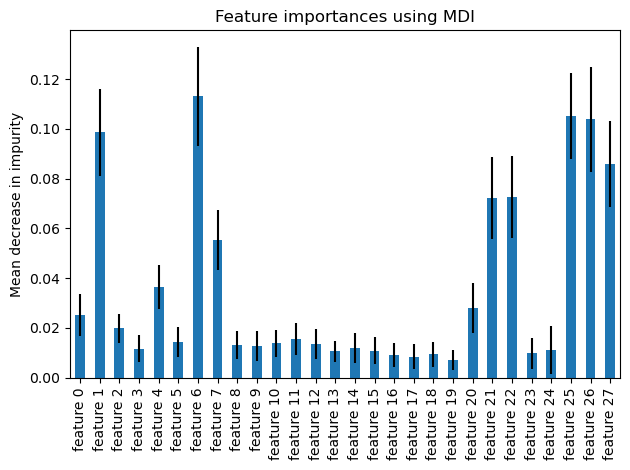

In [17]:
feature_names = [f"feature {i}" for i in range(X1.shape[1])]
importances = rf1.feature_importances_
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()

std = np.std([tree.feature_importances_ for tree in rf1.estimators_], axis=0)

forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [18]:
importances

array([0.0252211 , 0.09858181, 0.01983386, 0.01172032, 0.03647667,
       0.01444175, 0.11308214, 0.05528749, 0.0131986 , 0.01283018,
       0.01378356, 0.01545648, 0.0135667 , 0.01058441, 0.01196087,
       0.0109395 , 0.0091731 , 0.00851523, 0.00951462, 0.00713955,
       0.02802776, 0.07228204, 0.07248036, 0.00984152, 0.0111264 ,
       0.10519241, 0.1038564 , 0.08588516])

In [19]:
# Sort feature importance scores in descending order
indices = np.argsort(importances)[::-1]

# Print feature ranking
print("Feature ranking:")
for f in range(X1_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 6 (0.113082)
2. feature 25 (0.105192)
3. feature 26 (0.103856)
4. feature 1 (0.098582)
5. feature 27 (0.085885)
6. feature 22 (0.072480)
7. feature 21 (0.072282)
8. feature 7 (0.055287)
9. feature 4 (0.036477)
10. feature 20 (0.028028)
11. feature 0 (0.025221)
12. feature 2 (0.019834)
13. feature 11 (0.015456)
14. feature 5 (0.014442)
15. feature 10 (0.013784)
16. feature 12 (0.013567)
17. feature 8 (0.013199)
18. feature 9 (0.012830)
19. feature 14 (0.011961)
20. feature 3 (0.011720)
21. feature 24 (0.011126)
22. feature 15 (0.010939)
23. feature 13 (0.010584)
24. feature 23 (0.009842)
25. feature 18 (0.009515)
26. feature 16 (0.009173)
27. feature 17 (0.008515)
28. feature 19 (0.007140)


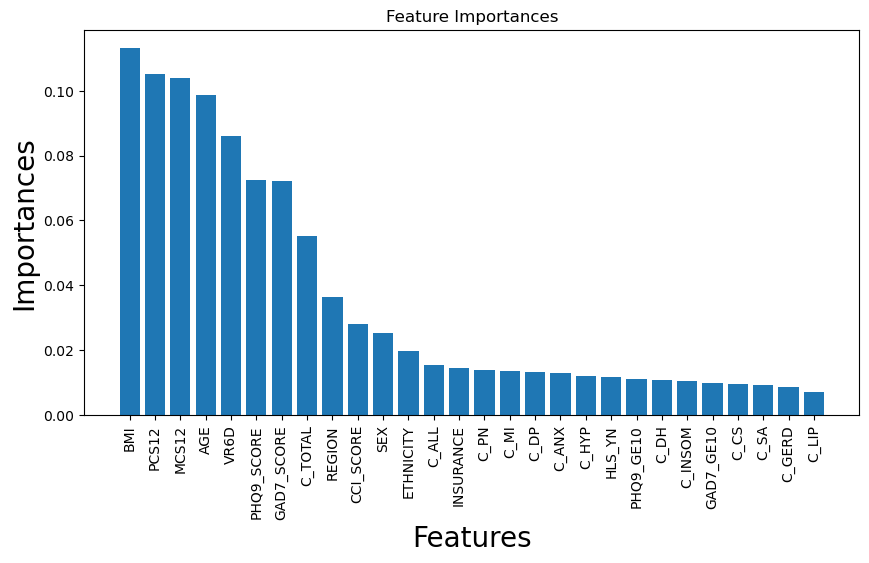

In [21]:
# indices = np.argsort(importances)[::-1]  # sort in descending order
feature_names = X1_train.columns.values  # get the names of the input features
plt.figure(figsize=(10, 5))
plt.title("Feature Importances")
plt.bar(range(X1.shape[1]), importances[indices])


plt.xlabel('Features', fontsize=20)
plt.ylabel('Importances', fontsize=20)

plt.xticks(range(X1.shape[1]), feature_names[indices], rotation=90)
plt.show()
# # Plot feature importance scores
# plt.figure(figsize=(10, 6))
# plt.title("Feature Importance Scores")
# plt.bar(range(X_train.shape[1]), importances[indices])
# plt.xticks(range(X_train.shape[1]), indices)
# plt.xlabel("Feature")
# plt.ylabel("Importance Score")
# plt.show()

## Boosted Model

For the boosted model, the predictive variables are: demographic and socioecomomic status, health conditions, and knowledge of psychedelic compounds.

In [9]:
X2 = df[['SEX', 'AGE', 'ETHNICITY', 'HLS_YN','REGION', 'INSURANCE',
       'BMI', 'C_TOTAL', 'C_DP', 'C_ANX',
       'C_PN', 'C_ALL', 'C_MI', 'C_INSOM', 'C_HYP', 'C_DH', 'C_SA', 'C_GERD',
       'C_CS', 'C_LIP', 'CCI_SCORE', 'GAD7_SCORE', 'PHQ9_SCORE', 'GAD7_GE10',
       'PHQ9_GE10', 'PCS12', 'MCS12', 'VR6D',
       'PSY1_POSITIVE_USE', 'PSY2_GEN_HEALTH', 'PSY2_DIAG_CONDITION', 'PSY2_UNDIAG_CONCERN', 'PSY2_NO_KNOWLEDGE']]
y2 = df['label']

# Split data into training and testing sets
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Fit a random forest model
rf2 = RandomForestClassifier(n_estimators=100, random_state=42)
rf2.fit(X2_train, y2_train)

# Evaluate model performance on test set
accuracy = rf2.score(X2_test, y2_test)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9327731092436975


In [10]:
# predictions = rf.predict(X_test)

[[1321    6]
 [  90   11]]


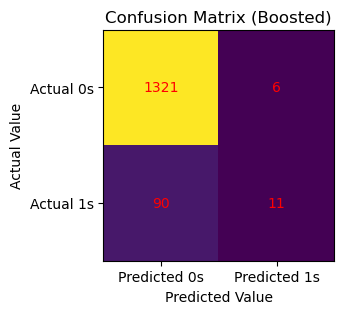

In [11]:
from sklearn.metrics import confusion_matrix
predictions = rf2.predict(X2_test)
cm = confusion_matrix(y2_test, predictions)
print(cm)

# conf_mat = confusion_matrix(y, model1.predict(X1))
fig, ax = plt.subplots(figsize=(3, 3))

ax.imshow(cm)
ax.grid(False)
ax.set_title('Confusion Matrix (Boosted)')
ax.set_xlabel('Predicted Value')
ax.set_ylabel('Actual Value')

ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s')) 
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s')) 
ax.set_ylim(1.5, -0.5)
for i in range(2): 
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

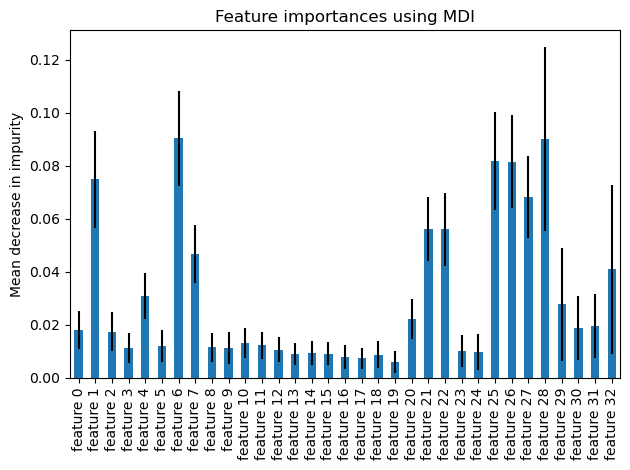

In [12]:
feature_names = [f"feature {i}" for i in range(X2.shape[1])]
importances = rf2.feature_importances_
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()

std = np.std([tree.feature_importances_ for tree in rf2.estimators_], axis=0)

forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [13]:
importances

array([0.01817381, 0.07483626, 0.01743224, 0.01116658, 0.03081062,
       0.01183896, 0.09029299, 0.04673017, 0.01148672, 0.01123642,
       0.01306761, 0.01224246, 0.01052746, 0.00898087, 0.00947284,
       0.00914748, 0.00770528, 0.00727812, 0.00865177, 0.00592248,
       0.02217572, 0.05629715, 0.05602829, 0.01001249, 0.00969396,
       0.08182602, 0.08159441, 0.06826739, 0.09009783, 0.02767843,
       0.01879183, 0.01964414, 0.04089119])

In [14]:
# Sort feature importance scores in descending order
indices = np.argsort(importances)[::-1]

# Print feature ranking
print("Feature ranking:")
for f in range(X2_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 6 (0.090293)
2. feature 28 (0.090098)
3. feature 25 (0.081826)
4. feature 26 (0.081594)
5. feature 1 (0.074836)
6. feature 27 (0.068267)
7. feature 21 (0.056297)
8. feature 22 (0.056028)
9. feature 7 (0.046730)
10. feature 32 (0.040891)
11. feature 4 (0.030811)
12. feature 29 (0.027678)
13. feature 20 (0.022176)
14. feature 31 (0.019644)
15. feature 30 (0.018792)
16. feature 0 (0.018174)
17. feature 2 (0.017432)
18. feature 10 (0.013068)
19. feature 11 (0.012242)
20. feature 5 (0.011839)
21. feature 8 (0.011487)
22. feature 9 (0.011236)
23. feature 3 (0.011167)
24. feature 12 (0.010527)
25. feature 23 (0.010012)
26. feature 24 (0.009694)
27. feature 14 (0.009473)
28. feature 15 (0.009147)
29. feature 13 (0.008981)
30. feature 18 (0.008652)
31. feature 16 (0.007705)
32. feature 17 (0.007278)
33. feature 19 (0.005922)


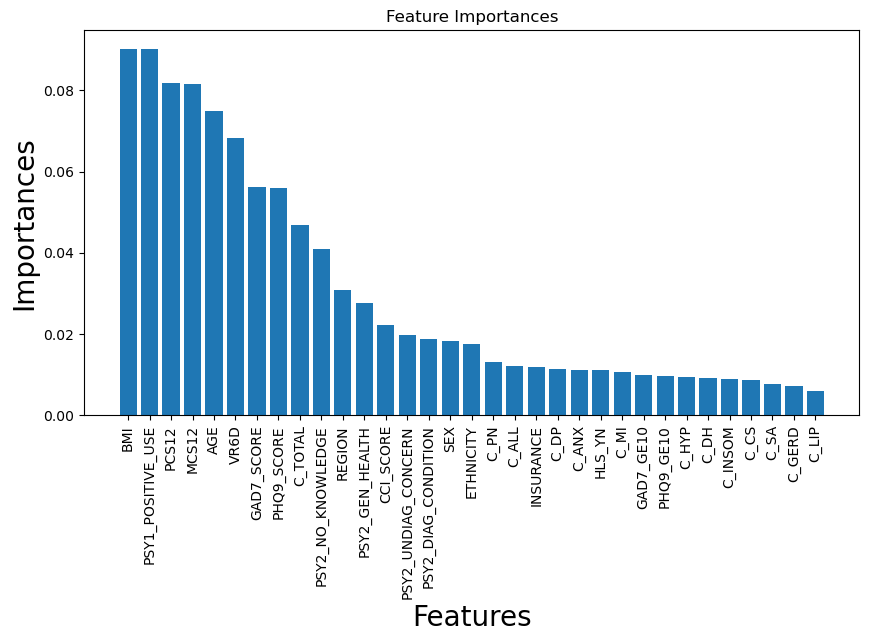

In [15]:
# indices = np.argsort(importances)[::-1]  # sort in descending order
feature_names = X2_train.columns.values  # get the names of the input features
plt.figure(figsize=(10, 5))
plt.title("Feature Importances")
plt.bar(range(X2.shape[1]), importances[indices])


plt.xlabel('Features', fontsize=20)
plt.ylabel('Importances', fontsize=20)

plt.xticks(range(X2.shape[1]), feature_names[indices], rotation=90)
plt.show()
# # Plot feature importance scores
# plt.figure(figsize=(10, 6))
# plt.title("Feature Importance Scores")
# plt.bar(range(X_train.shape[1]), importances[indices])
# plt.xticks(range(X_train.shape[1]), indices)
# plt.xlabel("Feature")
# plt.ylabel("Importance Score")
# plt.show()

<Axes: xlabel='Importance', ylabel='Feature'>

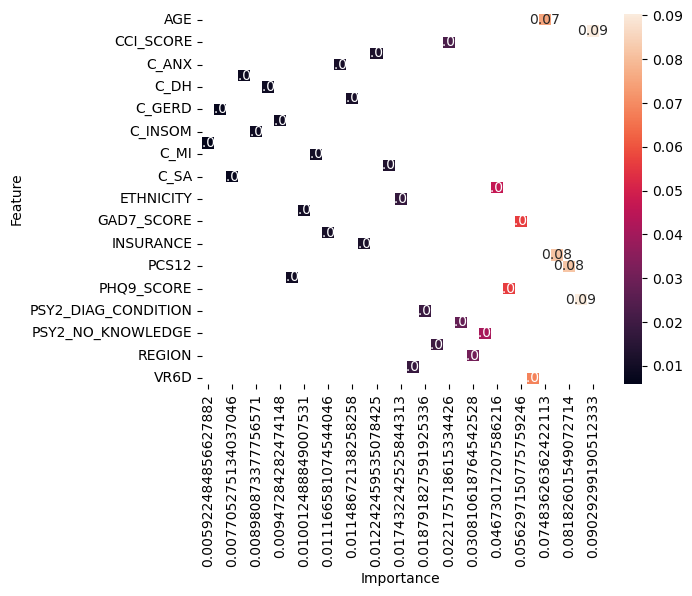

In [16]:
import seaborn as sns

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Reshape the DataFrame to create a heatmap
heatmap_df = importance_df.pivot(index='Feature', columns='Importance', values='Importance')

# Create the heatmap using Seaborn
sns.heatmap(heatmap_df, annot=True, fmt='.2f')

Random forest is a popular machine learning algorithm that is well-suited for binary classification problems, which involve predicting the outcome of a binary variable based on a set of input variables. One of the key strengths of the random forest algorithm is its ability to handle complex, high-dimensional data sets with a large number of variables. It works by building multiple decision trees on randomly sampled subsets of the input variables and then aggregating their predictions to make a final prediction. This approach helps to reduce overfitting and improve the generalizability of the model, making it less prone to errors on new, unseen data. Additionally, the algorithm is highly scalable, which means it can handle large data sets efficiently and with relatively low computational resources. Overall, the random forest algorithm is a powerful and flexible tool for binary classification problems, offering high accuracy and robustness, even when faced with noisy or incomplete data.